## Titanic - Aleksandra Jagiełło

In [42]:
#pip install --upgrade pip

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff

In [69]:
titanic_arff = arff.load(open("Zbiór danych Titanic.arff", 'r'))
print(titanic_arff.keys())

attribiutes = titanic_arff["attributes"]
data = titanic_arff["data"]

df = pd.DataFrame(data, columns=[x[0] for x in attribiutes])

df.head(20)

dict_keys(['description', 'relation', 'attributes', 'data'])


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


In [47]:
print(f"Liczba cech (features) w zbiorze: {df.shape[1]}")

Liczba cech (features) w zbiorze: 14


#### Liczba brakujacych wartości w poszczególnych kolumnach:

In [48]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Liczba brakujacych wartości w poszczególnych kolumnach:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


#### Procent brakujacych wartości w poszczególnych kolumnach:

In [49]:
missing_values_percentage = df.isnull().mean() * 100
print(missing_values_percentage)

Procent brakujacych wartości w poszczególnych kolumnach:
pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


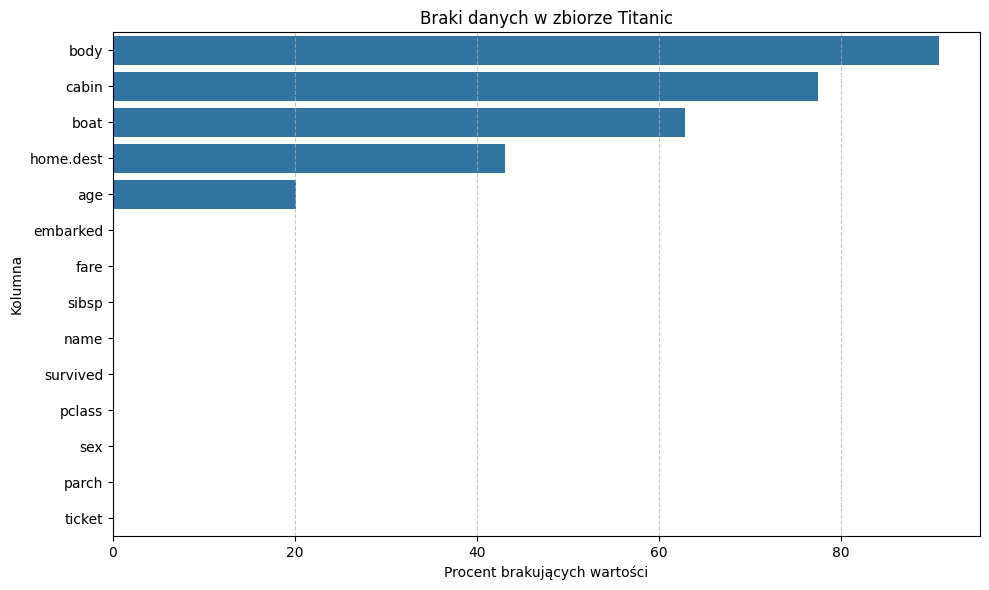

In [63]:
missing_summary = pd.DataFrame({
    'Kolumna': missing_values_count.index,
    'LiczbaBraków': missing_values_count.values,
    'ProcentBraków': missing_values_percentage.values
}).sort_values(by='ProcentBraków', ascending=False)

# Wykres
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_summary, x='ProcentBraków', y='Kolumna')

plt.title('Braki danych w zbiorze Titanic')
plt.xlabel('Procent brakujących wartości')
plt.ylabel('Kolumna')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
# Aby sprawdzić, czy braki danych w kolumnie age są związane ze zmienną (survived), tworzymy zmienną wskaźnikową:
df['AgeNull'] = np.where(df['age'].isnull(), 1, 0)
print(df.groupby('survived')['AgeNull'].mean())


survived
0    0.234858
1    0.146000
Name: AgeNull, dtype: float64


In [74]:
# skrócona wersja
print(df.assign(AgeNull=df['age'].isnull().astype(int)).groupby('survived')['AgeNull'].mean())

survived
0    0.234858
1    0.146000
Name: AgeNull, dtype: float64


##### Interpretacja

Wśród osób, które nie przeżyły, u ok 23.5% nie znamy ich wieku.
Wśród osób, które przeżyły, nie znamy wieku tylko ok 14.6% z nich.

Oznacza to, że braki w kolumnie age nie są całkowicie przypadkowe - są związane z danymi (survived).

##### Rodzaj braków danych

W Titanic dataset część braków może wynikać np. z tego, że niektóre dane nie zostały zebrane dla osób z niższych klas (np. Age), albo że osoby nie przeżyły i nikt nie zebrał dodatkowych danych

##### body - MNAR
- brak tej informacji oznacza brak odnalezionego ciała
- zależy od zgonu

##### cabin - MNAR
- Kabiny prawdopodobnie przydzielane były głównie pasażerom z wyższych klas
- więc brak sam w sobie ma znaczenie

##### boat - MNAR/MAR
- łodzie ratunkowe przypisano tylko tym, którzy przeżyli — osoby z brakiem tej informacji to niemal zawsze zmarli.
- brak silnie zależny od survived

##### home.dest - MAR
- Dane adresowe często niepodane przez osoby z niższych klas, emigrantów lub samotnych pasażerów.

##### age - MAR
- braki wieku częściej występują np. u osób, które nie przeżyły (dane są zależne od innych obserwowalnych cech)
- dana zależna od innych danych

##### embarked - MAR/MCAR
- braki tutaj mogą być wynikiem błędu zapisu
- minimalne braki

##### fare - MCAR
- minimalne braki
- być może mogły wyniknąć z błędu przy rejestrowaniu pasażerów



### W jaki sposób należy postąpić z brakującymi wartościami?

Dla kolumn z niskim procentem braków, na przykład do ~5% można uzupełnić je medianą.

Dla kolumn z umiarkowanym poziomem braków, załóżmy do 50%, można dane uzupełnić medianą, modelem regresyjnym lub imputacją grupową.

Dla kolumn z dużym odsetkiem braków, najlepiej utworzyć zmienne binarne.
Gdyby dane nie wnosiły wartości predykcyjnej można wziąć pod uwagę usunięcie ich z modelu.